[0.5        0.50496539 0.50988137 0.51474844 0.51956708 0.52433778
 0.529061   0.53373723 0.53836693 0.54295056]


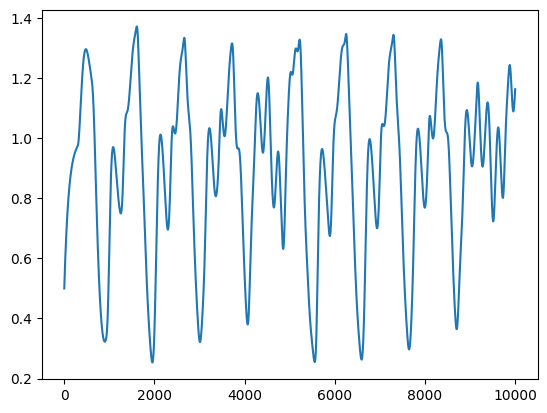

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def mackey_glass(tau=17, beta=0.2, gamma=0.1, n=10, time_series_length=10000, dt=0.1, x0=0.5):
    # Define the Mackey-Glass equation
    def mackey_glass_eq(x_t, t, x_history, tau, beta, gamma, n):
        x_tau = np.interp(t - tau, t_history, x_history)
        return beta * x_tau / (1 + x_tau**n) - gamma * x_t
    
    t_history = np.empty(0)
    x_history = np.empty(0)
    t_end = time_series_length * dt
    t = np.arange(0, t_end, dt)
    x = np.zeros(len(t))

    for i in range(len(t)):
        if i == 0:
            x[0] = x0
        else:
            x[i] = odeint(mackey_glass_eq, x[i-1], [t[i-1], t[i]], args=(x_history, tau, beta, gamma, n))[-1]

        t_history = np.append(t_history, t[i])
        x_history = np.append(x_history, x[i])
    
    return x, t

# Generate a Mackey-Glass time series and print the first 10 values
x, t = mackey_glass(time_series_length=10000, tau=30)
print(x[:10])
plt.plot(x)

First 10 x values: [0.50499024 0.50993059 0.51482152 0.51966355 0.52445716 0.52920283
 0.53390105 0.53855228 0.543157   0.54771568]
First 10 time points: [30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9]


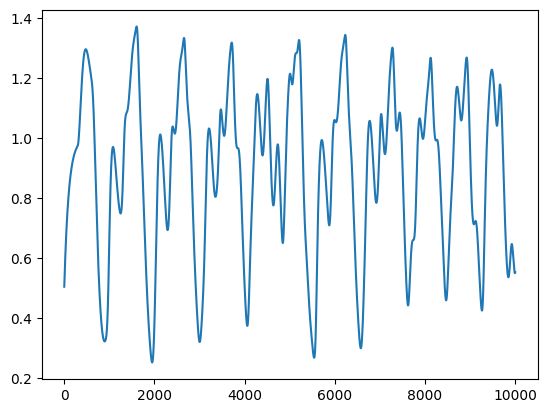

In [ ]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

@njit
def mackey_glass(sample_len=1000, tau=17, dt=0.1, beta=0.2, gamma=0.1, n=10, x0=0.5):
    hist_len = int(tau / dt)
    x = np.empty(sample_len + hist_len)
    x[:hist_len] = x0
    for t in range(hist_len, sample_len + hist_len):
        x_tau = x[t - hist_len]
        x[t] = x[t-1] + dt * (beta * x_tau / (1 + x_tau**n) - gamma * x[t-1])
    time_points = np.arange(hist_len*dt, (sample_len+hist_len)*dt, dt)
    return x[hist_len:], time_points

# Generate a Mackey-Glass time series and print the first 10 values
x, t = mackey_glass(sample_len=10000, tau=30)
print("First 10 x values:", x[:10])
print("First 10 time points:", t[:10])
plt.plot(x)

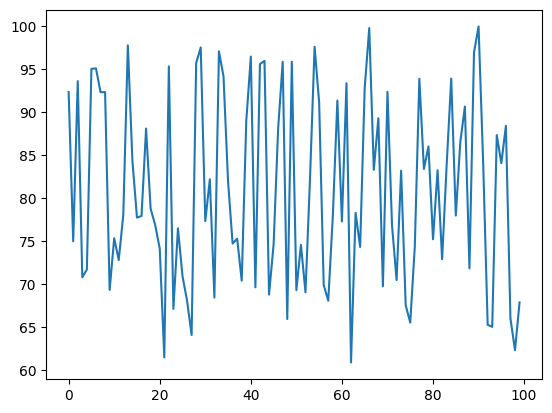

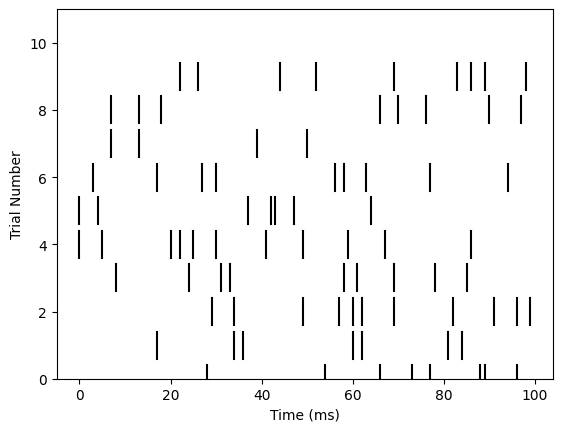

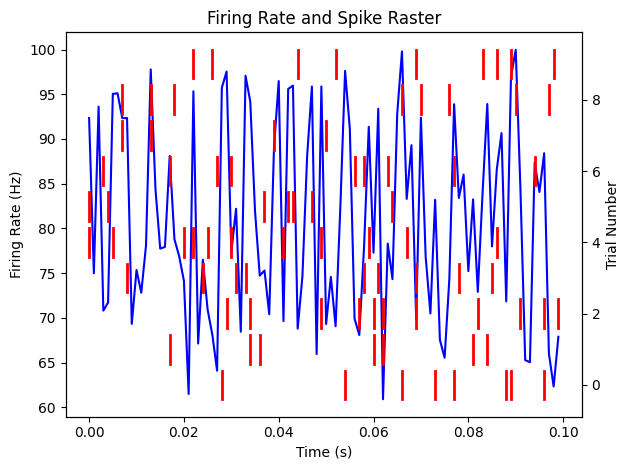

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_spike_gen(fr_t, t_sim, n_trials):
    dt = 1 / 1000  # s
    n_bins = int(np.floor(t_sim / dt))
    spike_mat = np.zeros((n_trials, n_bins), dtype=bool)
    t_vec = np.arange(0, t_sim, dt)
    for i_bin in range(n_bins):
        spike_mat[:, i_bin] = np.random.rand(n_trials) < fr_t[i_bin] * dt
    return spike_mat, t_vec

def plot_raster(spike_mat, t_vec):
    plt.figure()
    for trial_count in range(spike_mat.shape[0]):
        spike_pos = t_vec[spike_mat[trial_count, :]]
        for spike_count in range(len(spike_pos)):
            plt.plot([spike_pos[spike_count], spike_pos[spike_count]], [trial_count - 0.4, trial_count + 0.4], 'k')
    plt.ylim([0, spike_mat.shape[0] + 1])

# Define your time-dependent firing rate here
t_sim = 0.1
dt = 1 / 1000  # s
n_bins = int(np.floor(t_sim / dt))
t_vec = np.arange(0, t_sim, dt)
A = 60  # Lower bound
B = 100  # Upper bound
fr_t = np.random.rand(n_bins) * (B - A) + A # Random firing rate between 0 and 30
spike_mat, t_vec = poisson_spike_gen(fr_t, t_sim, 10)
 
plt.plot(fr_t)
plot_raster(spike_mat, t_vec * 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Trial Number')
plt.show()


fig, ax1 = plt.subplots()

ax1.plot(t_vec, fr_t, 'b-', label='Firing Rate')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Firing Rate (Hz)')
ax1.set_title('Firing Rate and Spike Raster')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
for trial_count in range(spike_mat.shape[0]):
    spike_pos = t_vec[spike_mat[trial_count, :]]
    for spike_count in range(len(spike_pos)):
        ax2.plot([spike_pos[spike_count], spike_pos[spike_count]], [trial_count - 0.4, trial_count + 0.4], 'r-', linewidth=2)
ax2.set_ylabel('Trial Number')

fig.tight_layout()
plt.show()

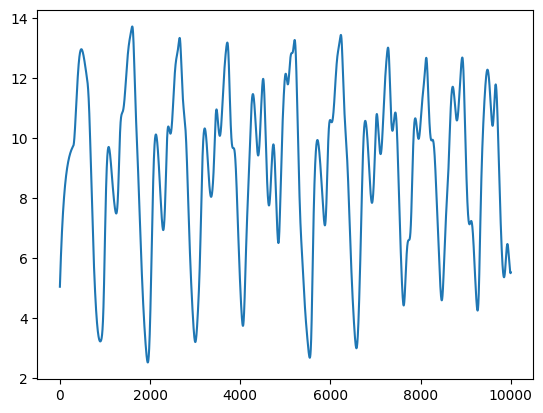

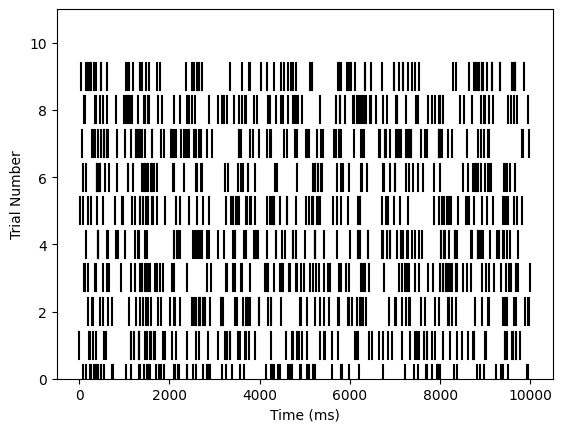

In [ ]:
sample_len = 10000
MG, t = mackey_glass(sample_len=sample_len, tau=30)
MG = MG * 10

plt.plot(MG)
spike_mat, t_vec = poisson_spike_gen(MG, sample_len/1000, 10)
plot_raster(spike_mat, t_vec * 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Trial Number')
plt.show()